# Import required libraries


In [333]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load dataset with Pandas

In [335]:
df=pd.read_csv("marks.csv")
df=pd.DataFrame(df)
df

,Hours,scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Explore the Dataset

In [362]:
df.shape

(25, 2)

In [364]:
df.describe()

,Hours,scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [354]:
df.columns

Index(['Hours', 'scores'], dtype='object')

# Relationship between Study Hours & Scores

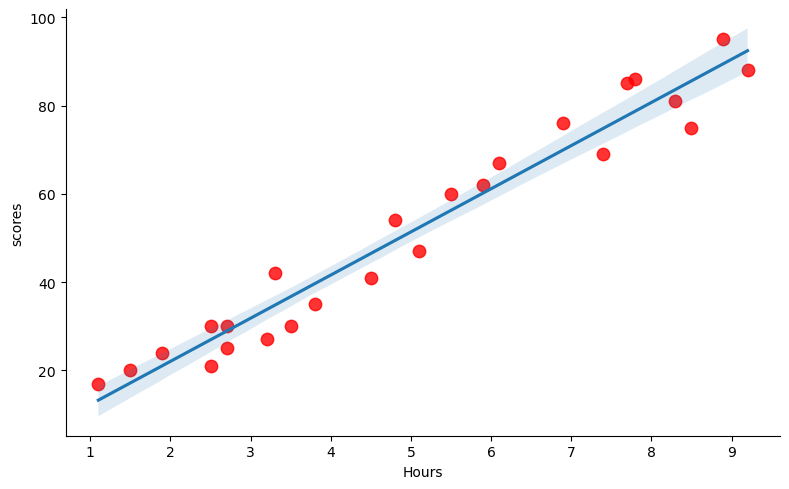

In [216]:
sns.lmplot(x='Hours', y='scores', data =df, scatter_kws = {'color' : 'red', 's':80}, aspect = 1.6)

#  Prepare Dataset for Training

In [297]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
x_train.shape

(20,)

In [299]:
print(f"Shape of train data",x_train.shape)
print(f"Shape of train data",y_train.shape)
print(f"Shape of test data",x_test.shape)
print(f"Shape of test data",y_test.shape)

Shape of train data (20,)
Shape of train data (20,)
Shape of test data (5,)
Shape of test data (5,)


In [301]:
x_train=np.array(x_train).reshape(-1,1)
x_train

array([[8.5],
       [4.8],
       [3.2],
       [5.9],
       [1.9],
       [3.5],
       [8.3],
       [2.5],
       [3.8],
       [2.7],
       [2.5],
       [2.7],
       [7.7],
       [6.9],
       [4.5],
       [5.1],
       [6.1],
       [1.5],
       [5.5],
       [9.2]])

In [303]:
x_test=np.array(x_test).reshape(-1,1)
x_test

array([[8.9],
       [7.8],
       [1.1],
       [7.4],
       [3.3]])

# MODEL TRAINING

In [304]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print("TRAINING DONE SUCCESSFULLY")

TRAINING DONE SUCCESSFULLY


In [307]:
print ('Slope of the linear model is ',lr.coef_) 

Slope of the linear model is  [9.74054996]


In [308]:
print("Intercept of linear model is ",lr.intercept_)

Intercept of linear model is  1.7557382016513827


In [311]:
y_pred=lr.predict(x_train)
y_pred

array([84.55041285, 48.510378  , 32.92549807, 59.22498296, 20.26278312,
       35.84766306, 82.60230286, 26.1071131 , 38.76982804, 28.05522309,
       26.1071131 , 28.05522309, 76.75797288, 68.96553291, 45.58821301,
       51.43254299, 61.17309295, 16.36656314, 55.32876297, 91.36879782])

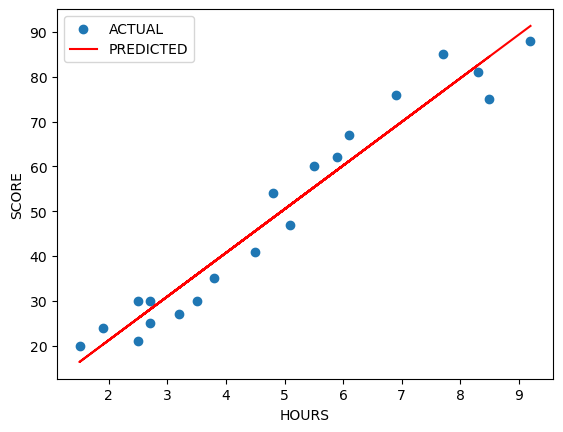

In [374]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred,color="red")
plt.xlabel("HOURS")
plt.ylabel("SCORE")
plt.legend(["ACTUAL","PREDICTED"])
plt.show()   

In [315]:
y_pred1=lr.predict(x_test)
y_pred1

array([88.44663283, 77.73202788, 12.47034316, 73.83580789, 33.89955306])

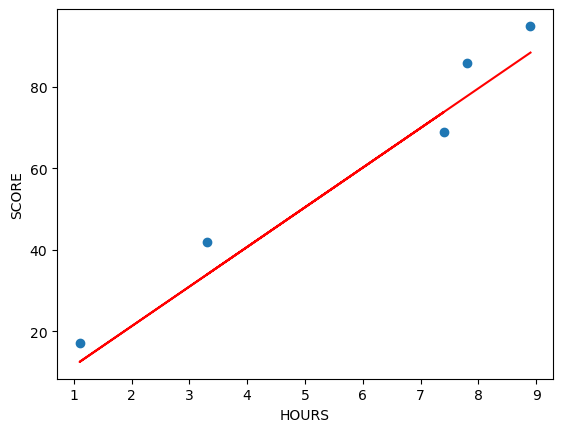

In [263]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred1,color="red")
plt.xlabel("HOURS")
plt.ylabel("SCORE")
plt.show()   

# MODEL VALIDATION

In [321]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²) Score:", r2)


Mean Absolute Error (MAE): 6.457450193167183
Mean Squared Error (MSE): 44.1652107906905
R-squared (R²) Score: 0.9466449081971943


# Visualize predicted and actual values of validation dataset

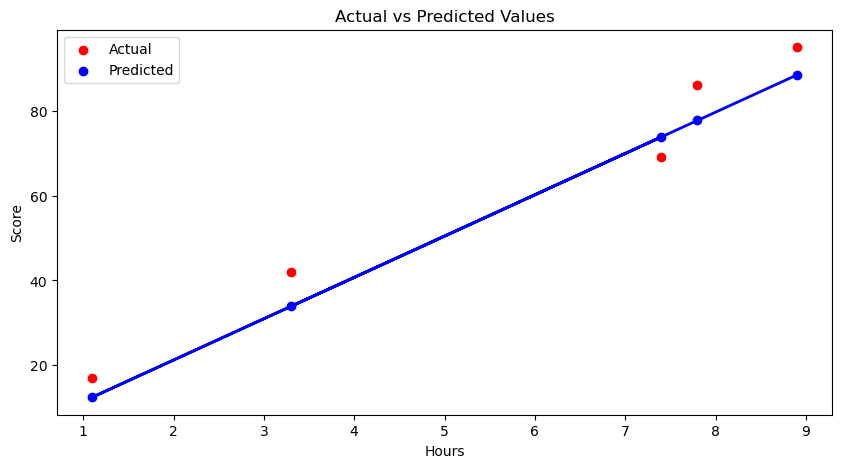

In [341]:
plt.figure(figsize=(10, 5))
plt.scatter(x_test, y_test, color='red', label='Actual')
plt.scatter(x_test, y_pred1, color='blue', label='Predicted')
plt.plot(x_test, y_pred1, color='blue', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.legend()
plt.show()

# MODEL APPLICATION

In [327]:
test_input = [[9.5]] 
lr.predict(test_input)

array([94.29096281])

In [331]:
print('The score of a student when he/she studies for 9.5 hrs/day is {:.2f}'.format(lr.predict(test_input)[0]))

The score of a student when he/she studies for 9.5 hrs/day is 94.29
